熵算法使用信息论的概念，将图像看做信源，来计算灰度级熵，一顿操作猛如虎计算出阈值，我反正没看懂。

结果与histogram相近

95


<function matplotlib.pyplot.show>

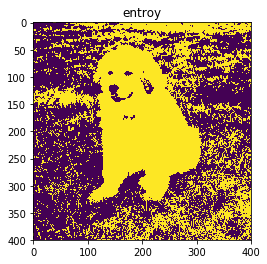

In [5]:
# -*- coding: utf-8 -*-
import sys
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
#计算图像灰度直方图
def calcGrayHist(image):
    #灰度图像矩阵的宽高
    rows,cols = image.shape
    #存储灰度直方图
    grayHist = np.zeros([256],np.uint32)
    for r in xrange(rows):
        for c in xrange(cols):
            grayHist[image[r][c]] +=1
    return grayHist
#熵阈值法
def threshEntroy(image):
    rows,cols = image.shape
    #求灰度直方图
    grayHist = calcGrayHist(image)
    #归一化灰度直方图
    normGrayHist = grayHist/float(rows*cols)
    #计算累加直方图，也称零阶累加矩
    zeroCumuMoment = np.zeros([256],np.float32)
    for k in xrange(256):
        if k==0:
            zeroCumuMoment[k] = normGrayHist[k]
        else:
            zeroCumuMoment[k] = zeroCumuMoment[k-1] + normGrayHist[k]
    #计算各个灰度级的熵
    entropy = np.zeros([256],np.float32)
    for k in xrange(256):
        if k==0:
            if normGrayHist[k] ==0:
                entropy[k] = 0
            else:
                entropy[k] = - normGrayHist[k]*math.log10(normGrayHist[k])
        else:
            if normGrayHist[k] ==0:
                entropy[k] = entropy[k-1]
            else:
               entropy[k] = entropy[k-1] - normGrayHist[k]*math.log10(normGrayHist[k])
    #找阈值
    fT = np.zeros([256],np.float32)
    ft1,ft2 = 0.0,0.0
    totalEntroy = entropy[255]
    for k in xrange(255):
        #找最大值
        maxFront = np.max(normGrayHist[0:k+1])
        maxBack = np.max(normGrayHist[k+1:256])
        if(maxFront == 0 or zeroCumuMoment[k] == 0 or maxFront==1 or zeroCumuMoment[k]==1 or totalEntroy==0):
            ft1 = 0
        else:
            ft1 =entropy[k]/totalEntroy*(math.log10(zeroCumuMoment[k])/math.log10(maxFront))
        if(maxBack == 0 or 1 - zeroCumuMoment[k]==0 or maxBack == 1 or 1-zeroCumuMoment[k] ==1):
            ft2 = 0
        else:
            if totalEntroy==0:
                ft2 = (math.log10(1-zeroCumuMoment[k])/math.log10(maxBack))
            else:
                ft2 = (1-entropy[k]/totalEntroy)*(math.log10(1-zeroCumuMoment[k])/math.log10(maxBack))
        fT[k] = ft1+ft2
    #找最大值的索引，作为得到的阈值
    threshLoc = np.where(fT==np.max(fT))
    thresh = threshLoc[0][0]
    #阈值处理
    threshold = np.copy(image)
    threshold[threshold > thresh] = 255
    threshold[threshold <= thresh] = 0
    return (threshold,thresh)
#主函数
image = cv2.imread("img7.jpg",0)
#阈值处理
threshold,thresh = threshEntroy(image);
#显示阈值后的二值化图像
cv2.imshow("threshEntroy",threshold)
print thresh
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.title("entroy")
plt.imshow(threshold)
plt.show


效果与histogram直方图法差不多，原理太复杂